In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

ds_reg = pd.read_csv("csgo_reg.csv")

# в них есть непонятный столбец Unnamed. Удаляем его
ds_reg = ds_reg.drop('Unnamed: 0', axis=1)
ds_reg

,time_left,ct_health,ct_players_alive,t_players_alive,t_health,t_money,ct_money,bomb_planted,round_winner
0,54.95,371.0,4.0,2.0,200.0,8100.0,1700.0,False,CT
1,89.90,500.0,5.0,5.0,500.0,1450.0,10100.0,False,T
2,54.95,500.0,5.0,5.0,356.0,1050.0,4900.0,False,T
3,54.94,200.0,2.0,5.0,422.0,33750.0,4850.0,False,T
4,89.95,435.0,5.0,4.0,382.0,350.0,17100.0,False,CT
...,...,...,...,...,...,...,...,...,...
99995,109.91,500.0,5.0,5.0,500.0,17100.0,14450.0,False,T
99996,169.95,500.0,5.0,5.0,500.0,2350.0,47250.0,False,T
99997,106.89,500.0,5.0,5.0,500.0,650.0,700.0,False,CT
99998,114.95,500.0,5.0,5.0,500.0,10700.0,8400.0,False,CT


In [71]:
ds_reg.describe()

,time_left,ct_health,ct_players_alive,t_players_alive,t_health,t_money,ct_money
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,97.921474,412.060280,4.272970,4.26432,402.491660,11202.475500,9796.754500
std,54.463680,132.319498,1.206446,1.23037,140.148533,12137.302292,11243.187761
min,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,54.920000,350.000000,4.000000,4.00000,321.000000,1550.000000,1300.000000
50%,94.910000,500.000000,5.000000,5.00000,500.000000,7100.000000,5450.000000
75%,166.920000,500.000000,5.000000,5.00000,500.000000,17950.000000,14600.000000
max,175.000000,500.000000,5.000000,5.00000,500.000000,80000.000000,80000.000000


In [72]:
# преобразовываем нечисловые данные в числовые
ds_reg_num = pd.get_dummies(ds_reg)
ds_reg_num.head(10)

,time_left,ct_health,ct_players_alive,t_players_alive,t_health,t_money,ct_money,bomb_planted,round_winner_CT,round_winner_T
0,54.95,371.0,4.0,2.0,200.0,8100.0,1700.0,False,1,0
1,89.90,500.0,5.0,5.0,500.0,1450.0,10100.0,False,0,1
2,54.95,500.0,5.0,5.0,356.0,1050.0,4900.0,False,0,1
3,54.94,200.0,2.0,5.0,422.0,33750.0,4850.0,False,0,1
4,89.95,435.0,5.0,4.0,382.0,350.0,17100.0,False,1,0
5,174.95,500.0,5.0,5.0,500.0,20050.0,13250.0,False,0,1
6,21.77,100.0,1.0,3.0,215.0,37850.0,1650.0,True,0,1
7,175.00,500.0,5.0,5.0,500.0,2550.0,1250.0,False,1,0
8,17.62,100.0,1.0,4.0,342.0,2100.0,0.0,True,0,1
9,74.97,300.0,3.0,3.0,300.0,12200.0,3150.0,False,1,0


In [73]:
# не преобразовался bool bomb_planted. Приводим в тип int
ds_reg_num["bomb_planted"] = ds_reg_num["bomb_planted"].astype(int)
ds_reg_num.head(10)

,time_left,ct_health,ct_players_alive,t_players_alive,t_health,t_money,ct_money,bomb_planted,round_winner_CT,round_winner_T
0,54.95,371.0,4.0,2.0,200.0,8100.0,1700.0,0,1,0
1,89.90,500.0,5.0,5.0,500.0,1450.0,10100.0,0,0,1
2,54.95,500.0,5.0,5.0,356.0,1050.0,4900.0,0,0,1
3,54.94,200.0,2.0,5.0,422.0,33750.0,4850.0,0,0,1
4,89.95,435.0,5.0,4.0,382.0,350.0,17100.0,0,1,0
5,174.95,500.0,5.0,5.0,500.0,20050.0,13250.0,0,0,1
6,21.77,100.0,1.0,3.0,215.0,37850.0,1650.0,1,0,1
7,175.00,500.0,5.0,5.0,500.0,2550.0,1250.0,0,1,0
8,17.62,100.0,1.0,4.0,342.0,2100.0,0.0,1,0,1
9,74.97,300.0,3.0,3.0,300.0,12200.0,3150.0,0,1,0


In [74]:
import sklearn.preprocessing as preprocessing

# Данный нормализатор выравнивает данные относительно максимального по модулю
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(ds_reg_num)
ma_norm_data = pd.DataFrame(columns=ds_reg_num.columns, data=ma_scaler.transform(ds_reg_num))
ma_norm_data

,time_left,ct_health,ct_players_alive,t_players_alive,t_health,t_money,ct_money,bomb_planted,round_winner_CT,round_winner_T
0,0.314000,0.742,0.8,0.4,0.400,0.101250,0.021250,0.0,1.0,0.0
1,0.513714,1.000,1.0,1.0,1.000,0.018125,0.126250,0.0,0.0,1.0
2,0.314000,1.000,1.0,1.0,0.712,0.013125,0.061250,0.0,0.0,1.0
3,0.313943,0.400,0.4,1.0,0.844,0.421875,0.060625,0.0,0.0,1.0
4,0.514000,0.870,1.0,0.8,0.764,0.004375,0.213750,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.628057,1.000,1.0,1.0,1.000,0.213750,0.180625,0.0,0.0,1.0
99996,0.971143,1.000,1.0,1.0,1.000,0.029375,0.590625,0.0,0.0,1.0
99997,0.610800,1.000,1.0,1.0,1.000,0.008125,0.008750,0.0,1.0,0.0
99998,0.656857,1.000,1.0,1.0,1.000,0.133750,0.105000,0.0,1.0,0.0


In [75]:
ma_norm_data.describe()

,time_left,ct_health,ct_players_alive,t_players_alive,t_health,t_money,ct_money,bomb_planted,round_winner_CT,round_winner_T
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.559551,0.824121,0.854594,0.852864,0.804983,0.140031,0.122459,0.11175,0.490540,0.509460
std,0.311221,0.264639,0.241289,0.246074,0.280297,0.151716,0.140540,0.31506,0.499913,0.499913
min,0.000057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.313829,0.700000,0.800000,0.800000,0.642000,0.019375,0.016250,0.00000,0.000000,0.000000
50%,0.542343,1.000000,1.000000,1.000000,1.000000,0.088750,0.068125,0.00000,0.000000,1.000000
75%,0.953829,1.000000,1.000000,1.000000,1.000000,0.224375,0.182500,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [89]:
# переопределение переменных
# В перепенной X_train хранятся данные для тренировки сети (входные)
# В перепенной Y_train хранятся данные для тренировки сети (выходные)
from sklearn.model_selection import train_test_split

X = ma_norm_data[['time_left', 'ct_players_alive', 't_players_alive', 't_health', 't_money', 'ct_money', 'bomb_planted', 'round_winner_CT', 'round_winner_T']]
Y = ma_norm_data[['ct_health']]

# Делим
# Делить будем в отношении 80/20
# 80 - это обучение
# 20 - тест
# первым делом перемешаем выборку (надо для того что бы обе выборки были репрезентативными)
XY_data = np.hstack( (X, Y) ).transpose((0,1))
np.random.shuffle(XY_data)
# Делим выборки
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data[:point_split]
test_data = XY_data[point_split:]
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
Y_test.head(10)

Всего данных: 100000
Тренировочных данных: 80000
Тестовых данных: 20000


,ct_health
75198,0.800
88048,0.598
66675,1.000
61691,1.000
83036,0.800
64007,0.632
82650,0.436
12522,0.702
9121,1.000
63785,0.934


In [88]:
import keras

# Строка отвечает за подключение сущности Dense которая реализует простой полносвязный слой сети (FFN)
from keras.layers import Dense

# Строка отвечает за подключение сущности Sequential которая реализует саму нейронную сеть
from keras.models import Sequential

# Это импорт (activations) содержи в себе список функций активации для сети
from keras import activations

# Тут мы подключаем алгоритмы тренировки Адам и алгоритм обратного распостранения ошибки(RMSprop)
from keras.optimizers import Adam, RMSprop

# Подключаем фукцию подсчета ошибки сети (кросэтропися для данных представленных в виде категорий)
from keras.losses import categorical_crossentropy, binary_crossentropy

# Подключаем фукцию подсчета метрики сети (точность попадания в категорию)
from keras.metrics import categorical_accuracy, binary_accuracy

# библиотека дополнительных возможностей (действий) при обучении сети
from keras import callbacks
from keras.layers import Dropout

# функция для создания новой нейронной сети
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(26, activation=activations.relu, input_dim=input_len))
    model.add(Dropout(0.5)) # ансамбальные модели - соединение в одну нескольких нейронок
    model.add(Dense(13, activation=activations.relu))
    model.add(Dropout(0.25))
    model.add(Dense(output_len, activation=activations.sigmoid))
    model.compile(Adam(), 'mse', metrics=['mae'])
    
    # MAE - Средняя абсолютная ошибка рассчитывается как среднее абсолютных разностей между целевыми значением и значением,
    # предсказанным моделью на данном обучающем примере в процессе обучения:
    
    return model

from pathlib import Path
from os import remove

# создадим функцию создания о очистки каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'nn_model_loss-{loss:.6f}_val_loss-{val_loss:.6f}.hdf5'

def make_save_points(name='save_points_lb3', file_name=file_name):
    checkpoints_dir = Path('./').joinpath('save_points_lb3')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))


In [81]:
"""Запускаем обучение сети с параметрами:

1 параметр: матрица с входным массивом
2 параметр: матрица с требуемыми ответами (выходная матрица)
verbose=0 : устанавливаем уровень вывода отладочной информации на 0 уровень
epochs=25 : задаем количество эпох для обучения (100 для начала более чем достаточно)
batch_size=3 : размер группы для обучения (пакетный метод), где говорится как часто пересчитывать веса сети (влияет на скорость и что более важно на качество обучения (параметр подбирается опытным путем))"""

# создаем новую нейронную сеть
model = make_nn(X_train.shape[1], Y_train.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=8,
    epochs=10,
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
            # На основе какого значения будет приниматься решеня об остановке
            monitor='val_loss',
            # Указываем направления лучшего значения (min, max, auto) 
            mode='min',
            # Количество эпох в резельтате которых если значение не изменилось, то произвести остановку
            patience=5,
            # "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.0001,
        ),
        # Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
            # Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
            # Указываем какое значение отслеживать
            monitor='val_loss',
            # Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
            # Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=2,
            # Указываем сторону лучших значений
            mode='min'
        )
    ]
    
)
print('Обучение закончено')

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\artem\new_machine\save_points_lb3
Epoch 1/10
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0114 - mae: 0.0643 - val_loss: 0.0037 - val_mae: 0.0309
Epoch 2/10
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0054 - mae: 0.0409 - val_loss: 0.0033 - val_mae: 0.0309
Epoch 3/10
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0051 - mae: 0.0394 - val_loss: 0.0035 - val_mae: 0.0309
Epoch 4/10
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0050 - mae: 0.0385 - val_loss: 0.0035 - val_mae: 0.0306
Epoch 5/10
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0050 - mae: 0.0386 - val_loss: 0.0033 - val_mae: 0.0305
Epoch 6/10
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0050 - mae: 0.0384 - val_loss: 0.0033 - val_mae: 0.0304
Epoch 7/10
10000/10000 [==============================] - 12s 1ms/step - 

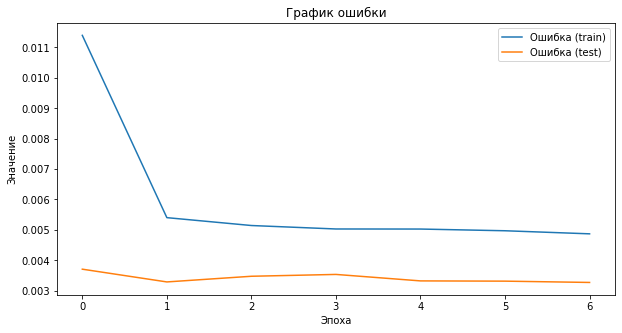

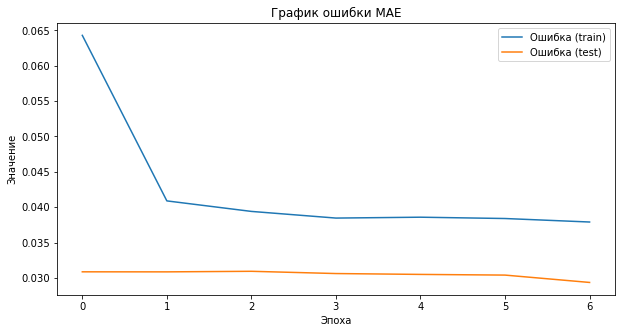

In [82]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('График ошибки MAE')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [84]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points_lb3/nn_model_loss-0.005401_val_loss-0.003287.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, Y_train)}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, Y_test)}')

2500/2500 [==============================] - 3s 1ms/step - loss: 0.0034 - mae: 0.0312
Точность предсказания на тренировочных данных [0.003353229956701398, 0.031160257756710052]
625/625 [==============================] - 1s 930us/step - loss: 0.0033 - mae: 0.0309
Точность предсказания на тестовых данных [0.0032865426037460566, 0.03085325099527836]


In [92]:
# получаем вероятность
print(loaded_model.predict(X_test.head(10)))

1/1 [==============================] - 0s 17ms/step
[[0.7141617 ]
 [0.51254404]
 [0.9999617 ]
 [0.999986  ]
 [0.8061155 ]
 [0.88470036]
 [0.45922342]
 [0.8112636 ]
 [0.9999858 ]
 [0.9916749 ]]


625/625 [==============================] - 1s 931us/step


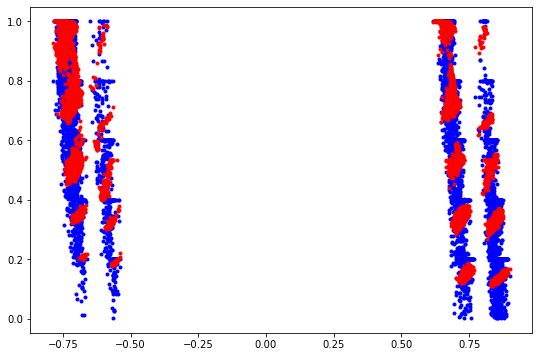

In [93]:
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

pca = PCA(n_components=1).fit(X_test)
fig, ax = plt.subplots(figsize=(9, 6))

pca_x = pca.transform(X_test)

ax.plot(pca_x, Y_test, 'bo', markersize=3)
ax.plot(pca_x, loaded_model.predict(X_test), 'ro', markersize=3)

# синии точки - это истинные
# красные - предсказынные

625/625 [==============================] - 1s 2ms/step


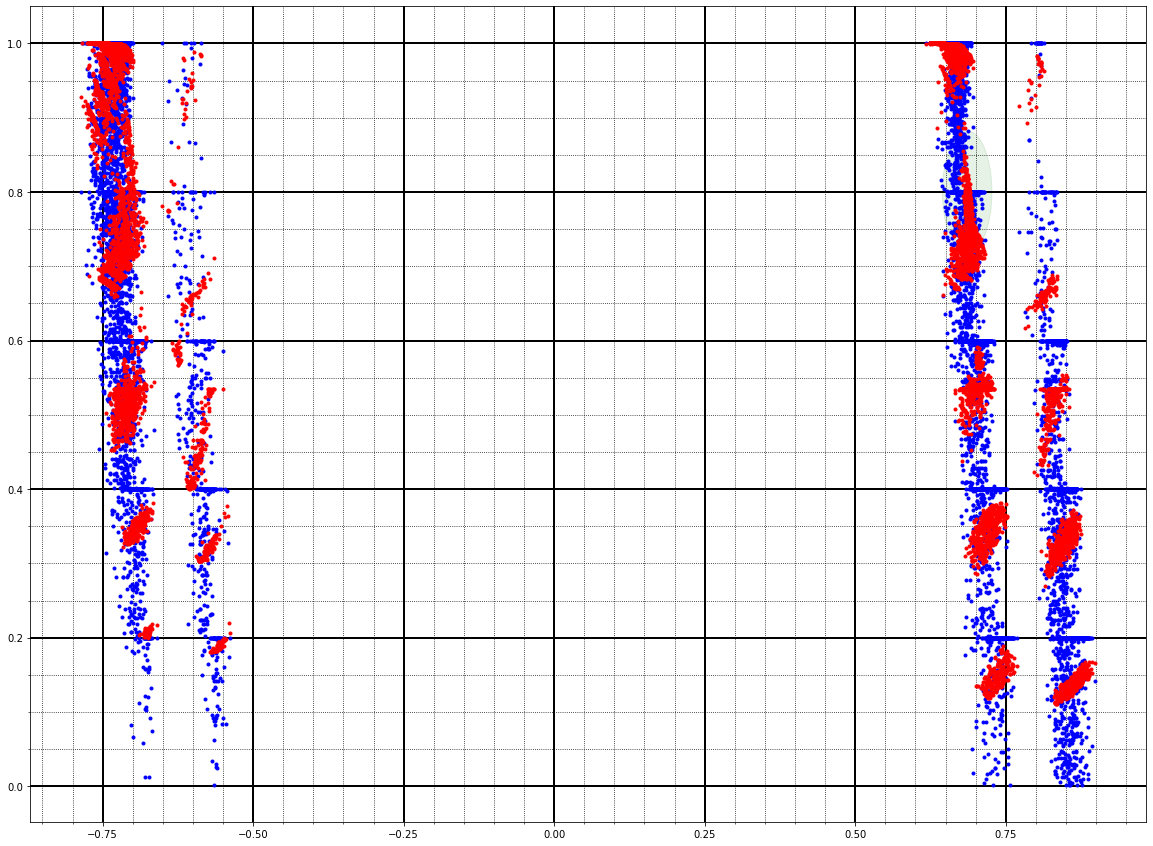

In [98]:
import scipy
from scipy.stats import t

from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

pca = PCA(n_components=1).fit(X_test)
fig, ax = plt.subplots(figsize=(20, 15))
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

#  Определяем внешний вид линий вспомогательной
#  сетки:

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

# 1 - 0.95.  95-квантиль, т.е. мы указываем границу ошибки в 5%
interval = t.interval(1 - 0.95, Y_test)
pca_x = pca.transform(X_test)

for i, y in enumerate(Y_test):
    e = Ellipse([pca_x[i], Y_test.iloc[i]], interval[0][i], interval[0][i]*2, color='green')
    ax.add_artist(e)
    e.set_alpha(0.1)

ax.plot(pca_x, Y_test, 'bo', markersize=3)
ax.plot(pca_x, loaded_model.predict(X_test), 'ro', markersize=3)

In [99]:
y = loaded_model.predict(X_test)

buf = ((Y_test+interval[0] < y) & (y < Y_test+interval[1])).astype(int)
buf.sum() / buf.size

625/625 [==============================] - 1s 2ms/step


ct_health    0.8972
dtype: float64